In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import scvelo as scv
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed.h5ad')

In [8]:
list(adata.var.columns)

['Accession',
 'Chromosome',
 'End',
 'Start',
 'Strand',
 'sum_allele_c57',
 'sum_allele_cast',
 'sum_ratio_allele_c57',
 'sum_ratio_allele_cast',
 'ratio_sum_allele_c57',
 'ratio_sum_allele_cast',
 'ratio_mean_allele_c57',
 'ratio_mean_allele_cast',
 'ratio_std_allele_c57',
 'ratio_std_allele_cast',
 'allele_p_value',
 'gene_name',
 'chromosome',
 'autosomes',
 'nuclear',
 'Ribosomal_prot']

In [1]:
adata


NameError: name 'adata' is not defined

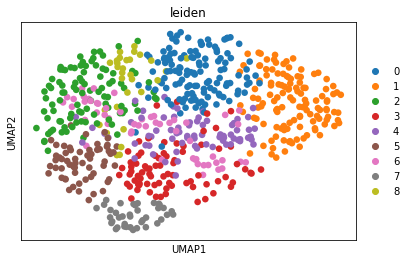

In [3]:
sc.pl.umap(adata, color='leiden')

<AxesSubplot:xlabel='ratio_std_allele_cast', ylabel='ratio_sum_allele_c57'>

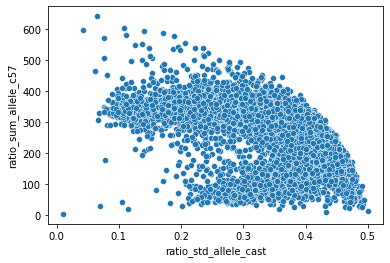

In [14]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="ratio_sum_allele_c57")

<AxesSubplot:xlabel='ratio_std_allele_cast', ylabel='ratio_sum_allele_cast'>

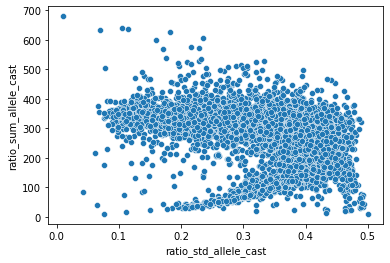

In [15]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="ratio_sum_allele_cast")

<AxesSubplot:xlabel='ratio_std_allele_c57', ylabel='ratio_mean_allele_c57'>

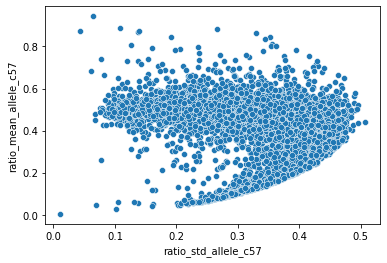

In [17]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="ratio_mean_allele_c57")

<AxesSubplot:xlabel='ratio_std_allele_cast', ylabel='ratio_mean_allele_cast'>

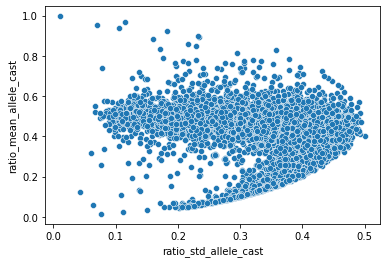

In [18]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="ratio_mean_allele_cast")

<AxesSubplot:xlabel='ratio_std_allele_c57', ylabel='ratio_mean_allele_c57'>

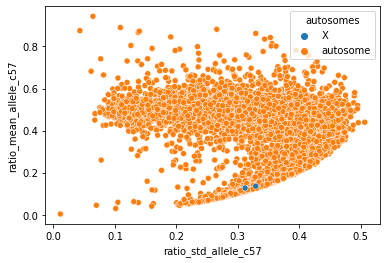

In [20]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="ratio_mean_allele_c57", hue="autosomes")

<AxesSubplot:xlabel='ratio_std_allele_cast', ylabel='ratio_mean_allele_cast'>

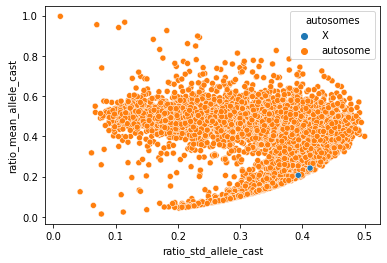

In [19]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="ratio_mean_allele_cast", hue="autosomes")

In [21]:
adata.var[adata.var['autosomes'] == 'X']

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,ratio_mean_allele_c57,ratio_mean_allele_cast,ratio_std_allele_c57,ratio_std_allele_cast,allele_p_value,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot
Gene,,,,,,,,,,,,,,,,,,,,,
Gm5637,ENSMUSG00000046993,X,60046229,60045111,-,225.0,361.0,0.383959,0.616041,92.535714,...,0.136082,0.206565,0.329156,0.393375,0.102677,Gm5637,X,X,nuclear,other protein
Mid1,ENSMUSG00000035299,X,170005736,169685199,+,148.0,292.0,0.336364,0.663636,85.383333,...,0.127248,0.242350,0.311895,0.412247,0.000415,Mid1,X,X,nuclear,other protein


<AxesSubplot:xlabel='ratio_std_allele_c57', ylabel='ratio_sum_allele_c57'>

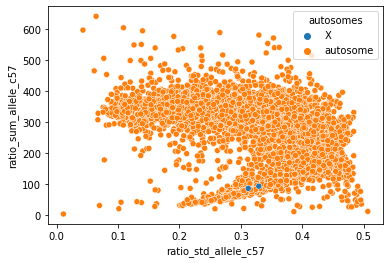

In [22]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="ratio_sum_allele_c57", hue="autosomes")

<AxesSubplot:xlabel='ratio_std_allele_cast', ylabel='ratio_sum_allele_cast'>

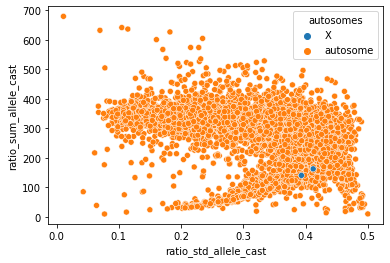

In [23]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="ratio_sum_allele_cast", hue="autosomes")

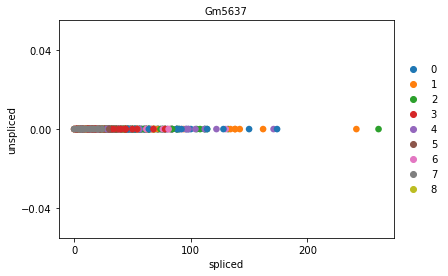

In [26]:
scv.pl.scatter(adata, 'Gm5637', color=['clusters'], legend_loc='right margin')

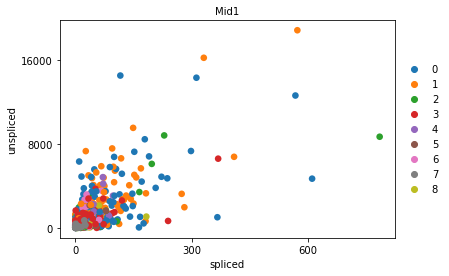

In [27]:
scv.pl.scatter(adata, 'Mid1', color=['clusters'], legend_loc='right margin')

In [28]:
adata.var['filter'] = ['not passing' for x in adata.var.index.tolist()]
adata.var.loc[
    ((adata.var.ratio_sum_allele_cast > 600) & (adata.var["ratio_std_allele_cast"] < 0.1 )) 
    | ((adata.var.ratio_sum_allele_c57 > 600) & (adata.var["ratio_std_allele_c57"] < 0.1 ))
    , 'filter'] = 'passing'

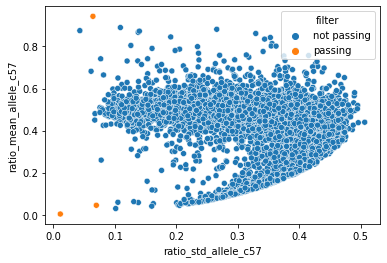

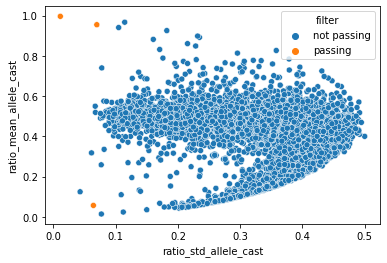

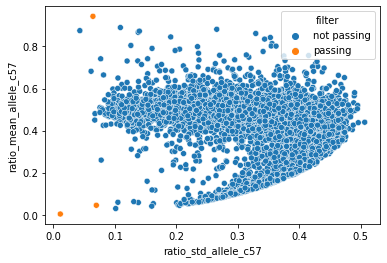

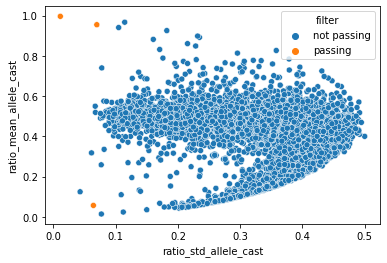

In [29]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="ratio_mean_allele_c57", hue="filter")
plt.show()
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="ratio_mean_allele_cast", hue="filter")
plt.show()
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="ratio_mean_allele_c57", hue="filter")
plt.show()
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="ratio_mean_allele_cast", hue="filter")
plt.show()

In [30]:
adata.var[adata.var['filter'] == 'passing']

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,ratio_mean_allele_cast,ratio_std_allele_c57,ratio_std_allele_cast,allele_p_value,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,filter
Gene,,,,,,,,,,,,,,,,,,,,,
Irx3,ENSMUSG00000031734,8,91802067,91798511,-,121.0,28574.0,0.004217,0.995783,2.601160,...,0.996186,0.011134,0.011134,0.0,Irx3,8,autosome,nuclear,other protein,passing
Fbxw9,ENSMUSG00000008167,8,85067124,85060055,+,974.0,19713.0,0.047083,0.952917,30.007564,...,0.954671,0.069743,0.069743,0.0,Fbxw9,8,autosome,nuclear,other protein,passing
Ccdc84,ENSMUSG00000043923,9,44418003,44410160,-,31783.0,2036.0,0.939797,0.060203,641.283944,...,0.056935,0.064227,0.064227,0.0,Ccdc84,9,autosome,nuclear,other protein,passing


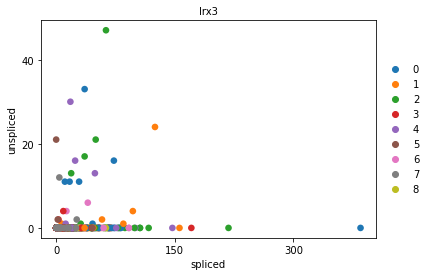

In [31]:
scv.pl.scatter(adata, 'Irx3', color=['clusters'], legend_loc='right margin')

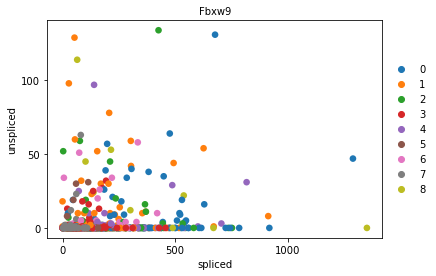

In [32]:
scv.pl.scatter(adata, 'Fbxw9', color=['clusters'], legend_loc='right margin')

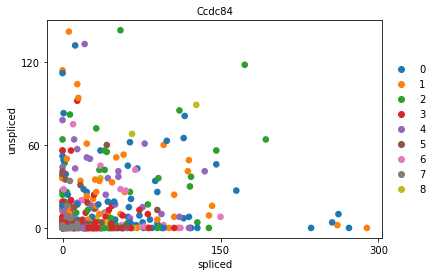

In [33]:
scv.pl.scatter(adata, 'Ccdc84', color=['clusters'], legend_loc='right margin')

<AxesSubplot:xlabel='allele_p_value', ylabel='ratio_std_allele_c57'>

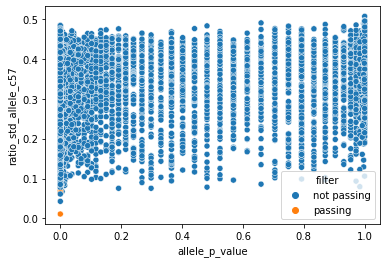

In [37]:
sns.scatterplot(data=adata.var, x="allele_p_value", y="ratio_std_allele_c57", hue="filter")

<AxesSubplot:xlabel='allele_p_value', ylabel='Density'>

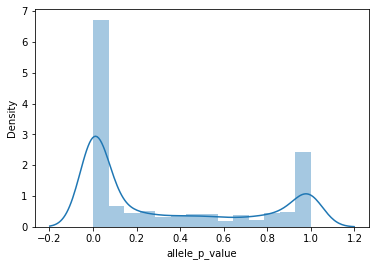

In [39]:
sns.distplot(adata.var.allele_p_value)